In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from copy import deepcopy as dc

from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [2]:
# files = ['/workspaces/Futures-First/Prediction/data/SB_nov-jan/2020.csv', '/workspaces/Futures-First/Prediction/data/SB_nov-jan/2021.csv', '/workspaces/Futures-First/Prediction/data/SB_nov-jan/2022.csv','/workspaces/Futures-First/Prediction/data/SB_nov-jan/2023.csv', '/workspaces/Futures-First/Prediction/data/SB_nov-jan/2024.csv']  

# # data = pd.read_csv(files[10])

# # data

In [4]:
# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_layer_size, output_size):
#         super(LSTM, self).__init__()
#         self.hidden_layer_size = hidden_layer_size
#         self.lstm = nn.LSTM(input_size, hidden_layer_size)
#         self.linear = nn.Linear(hidden_layer_size, output_size)
#         self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size).to(device),
#                             torch.zeros(1,1,self.hidden_layer_size).to(device))

#     def forward(self, input_seq):
#         lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
#         predictions = self.linear(lstm_out.view(len(input_seq), -1))
#         return predictions[-1]

In [3]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device

In [5]:
# for file in files[:-1]:  # Exclude the current year's data for training
#     # Load and preprocess data
#     data = pd.read_csv(file)
#     data['Date'] = pd.to_datetime(data['Date'])
#     data = data.rename(columns={'Open':'Price'})
#     data = data[['Date', 'Price']]

#     # Prepare the data for training
#     data['Price'] = data['Price'].astype(float)
#     data = data.set_index('Date')
#     price = data['Price'].values

#     # Create sequences for training
#     def create_sequences(data, seq_length):
#         xs = []
#         ys = []
#         for i in range(len(data)-seq_length):
#             x = data[i:i+seq_length]
#             y = data[i+seq_length]
#             xs.append(x)
#             ys.append(y)
#         return np.array(xs), np.array(ys)

#     seq_length = 12  # Example sequence length
#     X, y = create_sequences(price, seq_length)

#     X = torch.from_numpy(X).float().to(device)
#     y = torch.from_numpy(y).float().to(device)

#     # Define the model, loss function, and optimizer
#     model = LSTM(input_size=1, hidden_layer_size=50, output_size=1).to(device)
#     loss_function = nn.MSELoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#     # Train the model
#     model.train()
#     epochs = 100
#     for epoch in range(epochs):
#         for seq, labels in zip(X, y):
#             optimizer.zero_grad()
#             model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
#                                  torch.zeros(1, 1, model.hidden_layer_size).to(device))
#             y_pred = model(seq)
#             labels = labels.view(1)
#             single_loss = loss_function(y_pred, labels)
#             single_loss.backward()
#             optimizer.step()

#         if epoch % 10 == 0:
#             print(f'Epoch {epoch} loss: {single_loss.item()}')

#     # Save the trained model
#     torch.save(model.state_dict(), f'lstm_model_{file.split("/")[-1].split(".")[0]}.pt')

In [6]:
# current_year_file = files[-1]
# data = pd.read_csv(current_year_file)
# data['Date'] = pd.to_datetime(data['Date'])
# data = data[['Date', 'Price']]

# # Prepare the data for prediction
# data['Price'] = data['Price'].astype(float)
# data = data.set_index('Date')
# price = data['Price'].values

# # Use the most recent model for prediction
# model_file = 'lstm_model_2023.pt'
# model = LSTM(input_size=1, hidden_layer_size=50, output_size=1).to(device)
# model.load_state_dict(torch.load(model_file))
# model.eval()

# # Create sequences for prediction
# X, y = create_sequences(price, seq_length)

# X = torch.from_numpy(X).float().to(device)

# # Make predictions
# predictions = []
# for seq in X:
#     with torch.no_grad():
#         model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
#                              torch.zeros(1, 1, model.hidden_layer_size).to(device))
#         predictions.append(model(seq).item())

# # Plot the predictions
# plt.plot(data.index[seq_length:], predictions, label='Predicted Price')
# plt.plot(data.index, price, label='Actual Price')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [7]:
# current_year_file = files[-1]
# data = pd.read_csv(current_year_file)
# data['Date'] = pd.to_datetime(data['Date'])
# data = data[['Date', 'Price']]

# # Prepare the data for prediction
# data['Price'] = data['Price'].astype(float)
# data = data.set_index('Date')
# price = data['Price'].values

# # Use the most recent model for prediction
# model_file = 'lstm_model_2023.pt'
# model = LSTM(input_size=1, hidden_layer_size=50, output_size=1).to(device)
# model.load_state_dict(torch.load(model_file))
# model.eval()

# # Create sequences for prediction
# def create_sequences(data, seq_length):
#     xs = []
#     ys = []
#     for i in range(len(data) - seq_length):
#         x = data[i:i + seq_length]
#         y = data[i + seq_length]
#         xs.append(x)
#         ys.append(y)
#     return np.array(xs), np.array(ys)

# seq_length = 12  # Example sequence length

# # Create sequences for prediction
# X, y = create_sequences(price, seq_length)

# X = torch.from_numpy(X).float().to(device)

# # Make predictions
# predictions = []
# for seq in X:
#     with torch.no_grad():
#         model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
#                              torch.zeros(1, 1, model.hidden_layer_size).to(device))
#         predictions.append(model(seq).item())

# # Predict the next 7-10 days
# pred_days = 30
# last_seq = X[-1].cpu().numpy()

# for _ in range(pred_days):
#     seq = torch.from_numpy(last_seq).float().to(device)
#     with torch.no_grad():
#         model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
#                              torch.zeros(1, 1, model.hidden_layer_size).to(device))
#         pred = model(seq).item()
#         predictions.append(pred)
#         last_seq = np.append(last_seq[1:], pred)

# # Plot the predictions
# all_dates = np.append(data.index[seq_length:], pd.date_range(start=data.index[-1], periods=pred_days + 1, inclusive='right')[1:])

# # Create a Plotly figure
# fig = go.Figure()

# # Add actual price data to the figure
# fig.add_trace(go.Scatter(x=data.index, y=price, mode='lines', name='Actual Price'))

# # Add predicted price data to the figure
# fig.add_trace(go.Scatter(x=all_dates, y=predictions, mode='lines', name='Predicted Price'))

# # Update layout
# fig.update_layout(
#     title='Price Prediction',
#     xaxis_title='Date',
#     yaxis_title='Price'
# )

# # Show the figure
# fig.show()

# New Approach

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy as dc
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [39]:
temp_path = '/workspaces/Futures-First/Prediction/data/SB Nov-Jan'
# files = ['./data/2004.csv', './data/2005.csv', './data/2006.csv','./data/2007.csv', './data/2008.csv', './data/2009.csv','./data/2010.csv', './data/2011.csv', './data/2012.csv','./data/2013.csv', './data/2014.csv', './data/2015.csv','./data/2016.csv', './data/2017.csv', './data/2018.csv','./data/2019.csv', './data/2020.csv', './data/2021.csv','./data/2022.csv', './data/2023.csv', './data/2024.csv']  
# files = ['/workspaces/Futures-First/Prediction/data/SB_nov-jan/2020.csv', '/workspaces/Futures-First/Prediction/data/SB_nov-jan/2021.csv', '/workspaces/Futures-First/Prediction/data/SB_nov-jan/2022.csv','/workspaces/Futures-First/Prediction/data/SB_nov-jan/2023.csv', '/workspaces/Futures-First/Prediction/data/SB_nov-jan/2024.csv']  
files = [temp_path +'/2014.csv',temp_path +'/2015.csv', temp_path +'/2016.csv',temp_path +'/2017.csv', temp_path +'/2018.csv',temp_path +'/2019.csv', temp_path +'/2020.csv',temp_path +'/2021.csv',temp_path +'/2022.csv',temp_path +'/2023.csv',temp_path +'/2024.csv']  


In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [41]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


In [42]:
# def train_one_epoch(train_loader):
#     model.train(True)
#     print(f'Epoch: {epoch + 1}')
#     running_loss = 0.0

#     for batch_index, batch in enumerate(train_loader):
#         x_batch, y_batch = batch[0].to(device), batch[1].to(device)

#         output = model(x_batch)
#         loss = loss_function(output, y_batch)
#         running_loss += loss.item()

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if batch_index % 100 == 99:  # print every 100 batches
#             avg_loss_across_batches = running_loss / 100
#             print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
#                                                     avg_loss_across_batches))
#             running_loss = 0.0
#     print()


# def validate_one_epoch(test_loader):
#     model.train(False)
#     running_loss = 0.0

#     for batch_index, batch in enumerate(test_loader):
#         x_batch, y_batch = batch[0].to(device), batch[1].to(device)

#         with torch.no_grad():
#             output = model(x_batch)
#             loss = loss_function(output, y_batch)
#             running_loss += loss.item()

#     avg_loss_across_batches = running_loss / len(test_loader)

#     print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
#     print('***************************************************')
#     print()

In [43]:
# for file in files[:-1]:  # Exclude the current year's data for training
#     # Load and preprocess data
#     data = pd.read_csv(file)
#     data['Date'] = pd.to_datetime(data['Date'])
#     data = data.rename(columns={'Open':'Price'})
#     data = data[['Date', 'Price']]
#     plt.plot(data['Date'], data['Price'])

#     # # Prepare the data for training
#     # data['Price'] = data['Price'].astype(float)
#     # data = data.set_index('Date')
#     # price = data['Price'].values

#     def prepare_dataframe_for_lstm(df, n_steps):
#         df = dc(df)

#         df.set_index('Date', inplace=True)

#         for i in range(1, n_steps+1):
#             df[f'Price(t-{i})'] = df['Price'].shift(i)

#         df.dropna(inplace=True)

#         return df

#     lookback = 7
#     shifted_df = prepare_dataframe_for_lstm(data, lookback)

#     shifted_df_as_np = shifted_df.to_numpy()
#     scaler = MinMaxScaler(feature_range=(-1, 1))
#     shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

#     X = shifted_df_as_np[:, 1:]
#     y = shifted_df_as_np[:, 0]
#     X = dc(np.flip(X, axis=1))

#     X = X.reshape((-1, lookback, 1))
#     y = y.reshape((-1, 1))

#     X = torch.tensor(X).float()
#     y = torch.tensor(y).float()

#     class TimeSeriesDataset(Dataset):
#         def __init__(self, X, y):
#             self.X = X
#             self.y = y

#         def __len__(self):
#             return len(self.X)

#         def __getitem__(self, i):
#             return self.X[i], self.y[i]

#     train_dataset = TimeSeriesDataset(X, y)
    
#     batch_size = 16
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#     for _, batch in enumerate(train_loader):
#         x_batch, y_batch = batch[0].to(device), batch[1].to(device)
#         print(x_batch.shape, y_batch.shape)
#         break

#     model = LSTM(1, 4, 1)
#     model.to(device)
#     print(model)

#     learning_rate = 0.001
#     num_epochs = 50
#     loss_function = nn.MSELoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#     for epoch in range(num_epochs):
#         train_one_epoch(train_loader)
#         validate_one_epoch(train_loader)
#     torch.save(model.state_dict(), f'lstm_model_{file.split("/")[-1].split(".")[0]}.pt')
#     with torch.no_grad():
#         predicted = model(X.to(device)).to('cpu').numpy()

#     plt.plot(y, label='Actual Close')
#     plt.plot(predicted, label='Predicted Close')
#     plt.xlabel('Day')
#     plt.ylabel('Close')
#     plt.legend()
#     plt.show()




torch.Size([16, 7, 1]) torch.Size([16, 1])
LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1

Val Loss: 0.193
***************************************************

Epoch: 2

Val Loss: 0.151
***************************************************

Epoch: 3

Val Loss: 0.114
***************************************************

Epoch: 4

Val Loss: 0.098
***************************************************

Epoch: 5

Val Loss: 0.084
***************************************************

Epoch: 6

Val Loss: 0.079
***************************************************

Epoch: 7

Val Loss: 0.075
***************************************************

Epoch: 8

Val Loss: 0.068
***************************************************

Epoch: 9

Val Loss: 0.061
***************************************************

Epoch: 10

Val Loss: 0.058
***************************************************

Epoch: 11

Val Loss: 0.050
***********************************

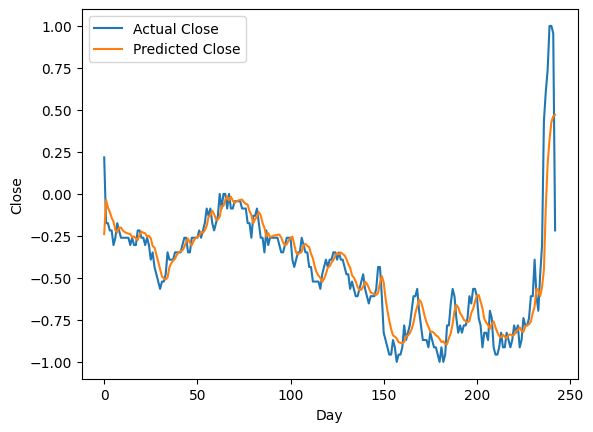

torch.Size([16, 7, 1]) torch.Size([16, 1])
LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1

Val Loss: 0.487
***************************************************

Epoch: 2

Val Loss: 0.428
***************************************************

Epoch: 3

Val Loss: 0.366
***************************************************

Epoch: 4

Val Loss: 0.288
***************************************************

Epoch: 5

Val Loss: 0.213
***************************************************

Epoch: 6

Val Loss: 0.135
***************************************************

Epoch: 7

Val Loss: 0.074
***************************************************

Epoch: 8

Val Loss: 0.047
***************************************************

Epoch: 9

Val Loss: 0.053
***************************************************

Epoch: 10

Val Loss: 0.044
***************************************************

Epoch: 11

Val Loss: 0.041
***********************************

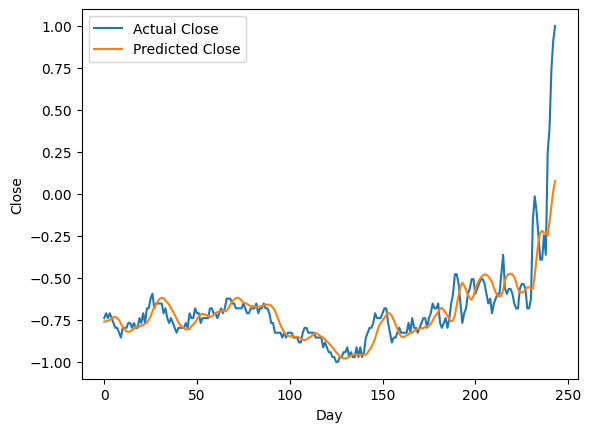

torch.Size([16, 7, 1]) torch.Size([16, 1])
LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1

Val Loss: 0.305
***************************************************

Epoch: 2

Val Loss: 0.276
***************************************************

Epoch: 3

Val Loss: 0.248
***************************************************

Epoch: 4

Val Loss: 0.229
***************************************************

Epoch: 5

Val Loss: 0.207
***************************************************

Epoch: 6

Val Loss: 0.188
***************************************************

Epoch: 7

Val Loss: 0.164
***************************************************

Epoch: 8

Val Loss: 0.155
***************************************************

Epoch: 9

Val Loss: 0.134
***************************************************

Epoch: 10

Val Loss: 0.121
***************************************************

Epoch: 11

Val Loss: 0.106
***********************************

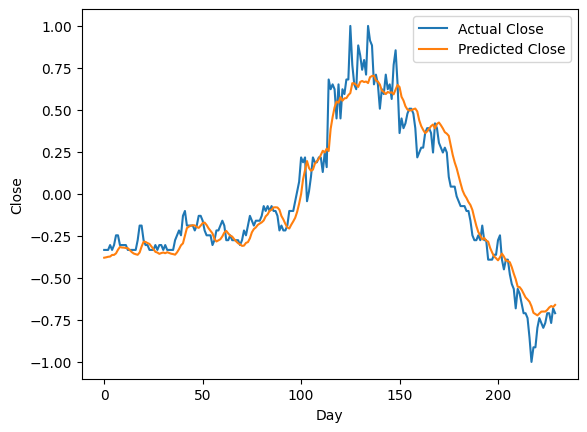

torch.Size([16, 7, 1]) torch.Size([16, 1])
LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1

Val Loss: 0.273
***************************************************

Epoch: 2

Val Loss: 0.293
***************************************************

Epoch: 3

Val Loss: 0.247
***************************************************

Epoch: 4

Val Loss: 0.246
***************************************************

Epoch: 5

Val Loss: 0.234
***************************************************

Epoch: 6

Val Loss: 0.230
***************************************************

Epoch: 7

Val Loss: 0.208
***************************************************

Epoch: 8

Val Loss: 0.197
***************************************************

Epoch: 9

Val Loss: 0.186
***************************************************

Epoch: 10

Val Loss: 0.170
***************************************************

Epoch: 11

Val Loss: 0.157
***********************************

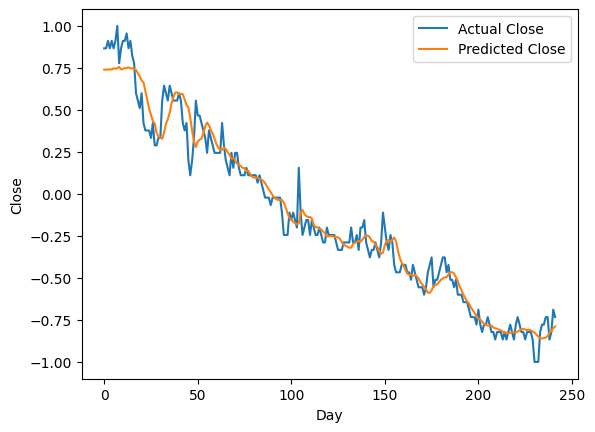

torch.Size([16, 7, 1]) torch.Size([16, 1])
LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1

Val Loss: 0.531
***************************************************

Epoch: 2

Val Loss: 0.490
***************************************************

Epoch: 3

Val Loss: 0.474
***************************************************

Epoch: 4

Val Loss: 0.464
***************************************************

Epoch: 5

Val Loss: 0.438
***************************************************

Epoch: 6

Val Loss: 0.421
***************************************************

Epoch: 7

Val Loss: 0.405
***************************************************

Epoch: 8

Val Loss: 0.383
***************************************************

Epoch: 9

Val Loss: 0.368
***************************************************

Epoch: 10

Val Loss: 0.332
***************************************************

Epoch: 11

Val Loss: 0.301
***********************************

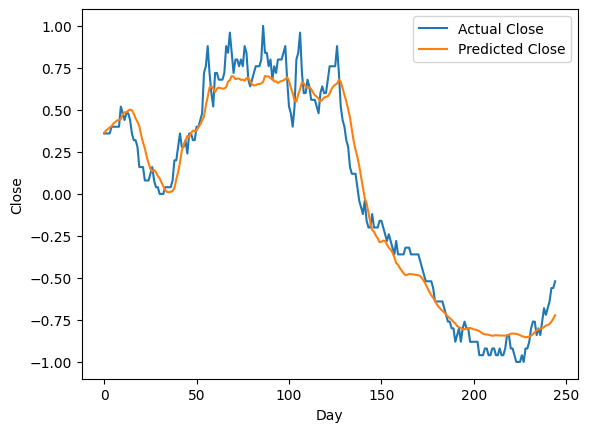

torch.Size([16, 7, 1]) torch.Size([16, 1])
LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1

Val Loss: 0.323
***************************************************

Epoch: 2

Val Loss: 0.303
***************************************************

Epoch: 3

Val Loss: 0.274
***************************************************

Epoch: 4

Val Loss: 0.251
***************************************************

Epoch: 5

Val Loss: 0.225
***************************************************

Epoch: 6

Val Loss: 0.197
***************************************************

Epoch: 7

Val Loss: 0.179
***************************************************

Epoch: 8

Val Loss: 0.159
***************************************************

Epoch: 9

Val Loss: 0.136
***************************************************

Epoch: 10

Val Loss: 0.119
***************************************************

Epoch: 11

Val Loss: 0.099
***********************************

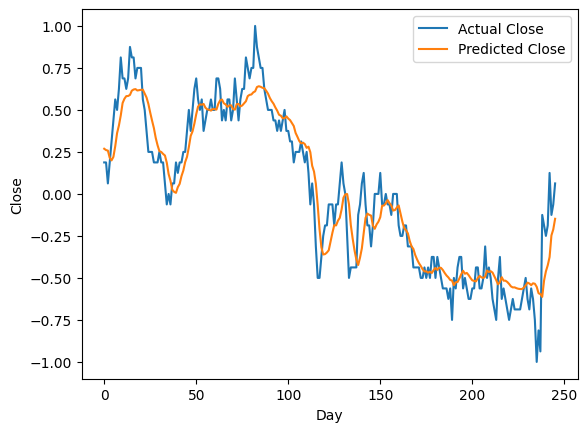

torch.Size([16, 7, 1]) torch.Size([16, 1])
LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1

Val Loss: 0.099
***************************************************

Epoch: 2

Val Loss: 0.090
***************************************************

Epoch: 3

Val Loss: 0.086
***************************************************

Epoch: 4

Val Loss: 0.071
***************************************************

Epoch: 5

Val Loss: 0.066
***************************************************

Epoch: 6

Val Loss: 0.057
***************************************************

Epoch: 7

Val Loss: 0.060
***************************************************

Epoch: 8

Val Loss: 0.050
***************************************************

Epoch: 9

Val Loss: 0.046
***************************************************

Epoch: 10

Val Loss: 0.044
***************************************************

Epoch: 11

Val Loss: 0.042
***********************************

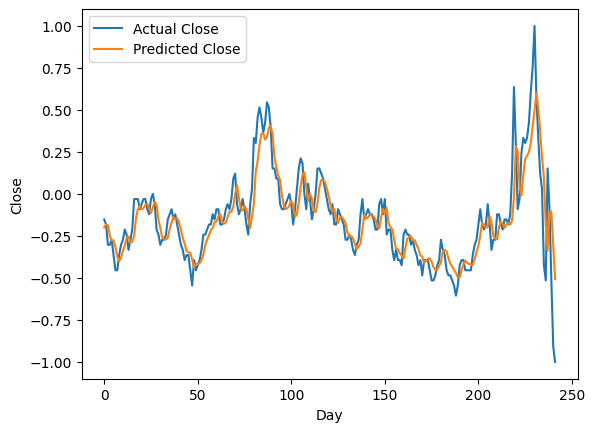

torch.Size([16, 7, 1]) torch.Size([16, 1])
LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1

Val Loss: 0.300
***************************************************

Epoch: 2

Val Loss: 0.282
***************************************************

Epoch: 3

Val Loss: 0.260
***************************************************

Epoch: 4

Val Loss: 0.239
***************************************************

Epoch: 5

Val Loss: 0.219
***************************************************

Epoch: 6

Val Loss: 0.194
***************************************************

Epoch: 7

Val Loss: 0.168
***************************************************

Epoch: 8

Val Loss: 0.143
***************************************************

Epoch: 9

Val Loss: 0.116
***************************************************

Epoch: 10

Val Loss: 0.093
***************************************************

Epoch: 11

Val Loss: 0.071
***********************************

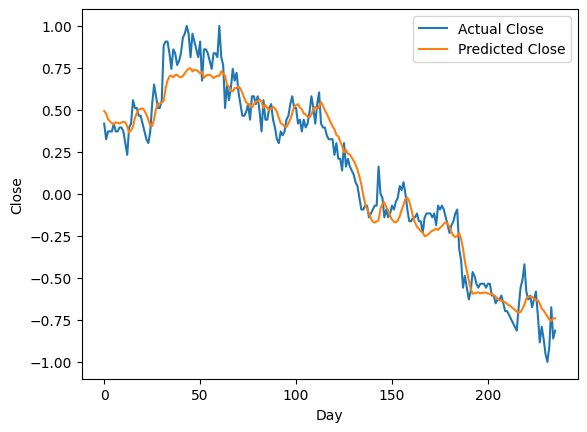

torch.Size([16, 7, 1]) torch.Size([16, 1])
LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1

Val Loss: 0.444
***************************************************

Epoch: 2

Val Loss: 0.388
***************************************************

Epoch: 3

Val Loss: 0.339
***************************************************

Epoch: 4

Val Loss: 0.293
***************************************************

Epoch: 5

Val Loss: 0.254
***************************************************

Epoch: 6

Val Loss: 0.216
***************************************************

Epoch: 7

Val Loss: 0.183
***************************************************

Epoch: 8

Val Loss: 0.152
***************************************************

Epoch: 9

Val Loss: 0.130
***************************************************

Epoch: 10

Val Loss: 0.112
***************************************************

Epoch: 11

Val Loss: 0.097
***********************************

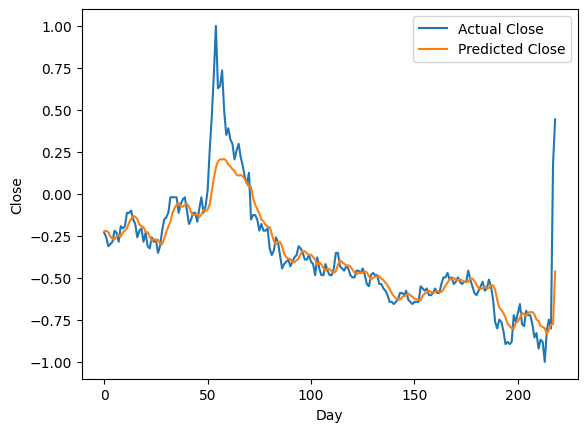

torch.Size([16, 7, 1]) torch.Size([16, 1])
LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1

Val Loss: 0.306
***************************************************

Epoch: 2

Val Loss: 0.253
***************************************************

Epoch: 3

Val Loss: 0.244
***************************************************

Epoch: 4

Val Loss: 0.256
***************************************************

Epoch: 5

Val Loss: 0.224
***************************************************

Epoch: 6

Val Loss: 0.217
***************************************************

Epoch: 7

Val Loss: 0.211
***************************************************

Epoch: 8

Val Loss: 0.210
***************************************************

Epoch: 9

Val Loss: 0.216
***************************************************

Epoch: 10

Val Loss: 0.225
***************************************************

Epoch: 11

Val Loss: 0.222
***********************************

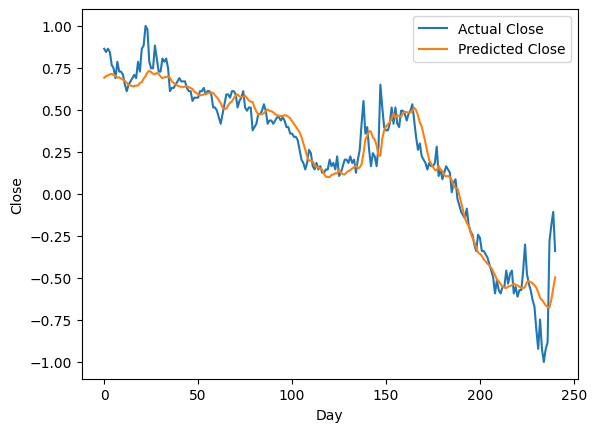

In [44]:
# Function updates
def train_one_epoch(train_loader, model, optimizer, loss_function, epoch):
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print(f'Batch {batch_index + 1}, Loss: {avg_loss_across_batches:.3f}')
            running_loss = 0.0
    print()

def validate_one_epoch(test_loader, model, loss_function):
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print(f'Val Loss: {avg_loss_across_batches:.3f}')
    print('***************************************************')
    print()

class TimeSeriesDataset(Dataset):
        def __init__(self, X, y):
            self.X = X
            self.y = y

        def __len__(self):
            return len(self.X)

        def __getitem__(self, i):
            return self.X[i], self.y[i]
# Main loop
for file in files[:-1]:  # Exclude the current year's data for training
    # Load and preprocess data
    data = pd.read_csv(file)
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.rename(columns={'Open':'Price'})
    data = data[['Date', 'Price']]
    # plt.plot(data['Date'], data['Price'])
    # plt.show()  # Show the plot for each file

    # Prepare the data for training
    def prepare_dataframe_for_lstm(df, n_steps):
        df = dc(df)

        df.set_index('Date', inplace=True)

        for i in range(1, n_steps+1):
            df[f'Price(t-{i})'] = df['Price'].shift(i)

        df.dropna(inplace=True)

        return df

    lookback = 7
    shifted_df = prepare_dataframe_for_lstm(data, lookback)

    shifted_df_as_np = shifted_df.to_numpy()
    scaler = MinMaxScaler(feature_range=(-1, 1))
    shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

    X = shifted_df_as_np[:, 1:]
    y = shifted_df_as_np[:, 0]
    X = dc(np.flip(X, axis=1))

    X = X.reshape((-1, lookback, 1))
    y = y.reshape((-1, 1))

    X = torch.tensor(X).float()
    y = torch.tensor(y).float()

    train_dataset = TimeSeriesDataset(X, y)
    
    batch_size = 16
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    for _, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        print(x_batch.shape, y_batch.shape)
        break

    model = LSTM(1, 4, 1)
    model.to(device)
    print(model)

    learning_rate = 0.001
    num_epochs = 50
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        train_one_epoch(train_loader, model, optimizer, loss_function, epoch)
        validate_one_epoch(train_loader, model, loss_function)

    torch.save(model.state_dict(), f'lstm_model_{file.split("/")[-1].split(".")[0]}.pt')
    with torch.no_grad():
        predicted = model(X.to(device)).to('cpu').numpy()

    plt.plot(y, label='Actual Close')
    plt.plot(predicted, label='Predicted Close')
    plt.xlabel('Day')
    plt.ylabel('Close')
    plt.legend()
    plt.show()


In [34]:
# def prepare_dataframe_for_lstm(df, n_steps):
#     df = dc(df)

#     df.set_index('Date', inplace=True)

#     for i in range(1, n_steps+1):
#         df[f'Price(t-{i})'] = df['Price'].shift(i)

#     df.dropna(inplace=True)

#     return df

# data = pd.read_csv('/workspaces/Futures-First/Prediction/data/SB_nov-jan/2024.csv')
# data['Date'] = pd.to_datetime(data['Date'])
# data = data.rename(columns={'Open':'Price'})
# data = data[['Date', 'Price']]

# lookback = 7
# shifted_df = prepare_dataframe_for_lstm(data, lookback)

# shifted_df_as_np = shifted_df.to_numpy()
# scaler = MinMaxScaler(feature_range=(-1, 1))
# shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

# X = shifted_df_as_np[:, 1:]
# y = shifted_df_as_np[:, 0]
# X = dc(np.flip(X, axis=1))

# X = X.reshape((-1, lookback, 1))
# y = y.reshape((-1, 1))

# X_test = torch.tensor(X).float()
# y_test = torch.tensor(y).float()

# # test_dataset = TimeSeriesDataset(X, y)
    
# # batch_size = 16
# # test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# # Use the most recent model for prediction
# model_file = 'lstm_model_2023.pt'
# model = LSTM(input_size=1, hidden_size=4, num_stacked_layers=1).to(device)
# model.load_state_dict(torch.load(model_file))
# model.eval()

# test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

# dummies = np.zeros((X_test.shape[0], lookback+1))
# dummies[:, 0] = test_predictions
# dummies = scaler.inverse_transform(dummies)

# test_predictions = dc(dummies[:, 0])

# dummies = np.zeros((X_test.shape[0], lookback+1))
# dummies[:, 0] = y_test.flatten()
# dummies = scaler.inverse_transform(dummies)

# new_y_test = dc(dummies[:, 0])

# plt.plot(new_y_test, label='Actual Close')
# plt.plot(test_predictions, label='Predicted Close')
# plt.xlabel('Day')
# plt.ylabel('Close')
# plt.legend()
# plt.show()

In [45]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy as dc
import plotly.graph_objects as go

# Function to prepare data for LSTM
def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    df.set_index('Date', inplace=True)
    for i in range(1, n_steps+1):
        df[f'Price(t-{i})'] = df['Price'].shift(i)
    df.dropna(inplace=True)
    return df

# Load and prepare the data
data = pd.read_csv(files[-1])
data['Date'] = pd.to_datetime(data['Date'])
data = data.rename(columns={'Open':'Price'})
data = data[['Date', 'Price']]

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)

shifted_df_as_np = shifted_df.to_numpy()
scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]
X = dc(np.flip(X, axis=1))

X = X.reshape((-1, lookback, 1))
y = y.reshape((-1, 1))

X_test = torch.tensor(X).float()
y_test = torch.tensor(y).float()

# Load the trained model
model_file = 'lstm_model_2023.pt'
model = LSTM(input_size=1, hidden_size=4, num_stacked_layers=1).to(device)
model.load_state_dict(torch.load(model_file))
model.eval()

# Predict the last part of the dataset
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

# Inverse transform the predictions
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)
test_predictions = dc(dummies[:, 0])

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)
new_y_test = dc(dummies[:, 0])

# Prepare for predicting future prices
last_window = X_test[-1].cpu().numpy()

future_predictions = []

# Predict the next 5 days
for _ in range(10):
    # Predict the next price
    pred = model(torch.tensor(last_window).unsqueeze(0).float().to(device)).detach().cpu().numpy().flatten()[0]
    
    # Scale back to original price
    dummies = np.zeros((1, lookback + 1))
    dummies[:, 0] = pred
    dummies = scaler.inverse_transform(dummies)
    
    pred_original = dummies[:, 0][0]
    future_predictions.append(pred_original)
    
    # Update the window for the next prediction
    last_window = np.roll(last_window, -1)
    last_window[-1, 0] = pred

# Combine all predictions
all_predictions = np.concatenate((test_predictions, np.array(future_predictions)))

# Create plotly figure
fig = go.Figure()

# Add traces for actual and predicted values
fig.add_trace(go.Scatter(
    x=np.arange(len(new_y_test)),
    y=new_y_test,
    mode='lines',
    name='Actual Close'
))

fig.add_trace(go.Scatter(
    x=np.arange(len(test_predictions)),
    y=test_predictions,
    mode='lines',
    name='Predicted Close (Past)'
))

fig.add_trace(go.Scatter(
    x=np.arange(len(test_predictions), len(all_predictions)),
    y=future_predictions,
    mode='lines',
    name='Predicted Close (Future)',
    # line=dict(dash='dash')
))

# Update layout
fig.update_layout(
    title="Soybean Futures Price Prediction",
    xaxis_title="Day",
    yaxis_title="Close Price",
    legend_title="Legend"
)

# Show plot
fig.show()


/tmp/ipykernel_39041/2161306805.py:19: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipykernel_39041/2161306805.py:43: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case wh

In [36]:
future_predictions

[-52.28647029399872,
 -51.66170370578766,
 -51.324867725372314,
 -51.12218403816223,
 -50.956451177597046,
 -50.8246386051178,
 -50.679150104522705,
 -50.53913378715515,
 -50.46416532993317,
 -50.410600900650024]